In [6]:
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import gymnasium as gym

from q_learning_agent import KlappbrettAgent
from klappbrettEnv import Klappbrett
from analysis_tools import plot_training, plot_policy, calculate_policy
from baseline_policies import choose_from_lexographical_ordering

In [7]:
%load_ext autoreload
%autoreload 2

# Train Agent

In [8]:
n_episodes = 1_000_000

# environment hyperparameters
render_mode=None
board_size=9
number_of_dice=2
number_of_sides = 6

# agent hyperparameters
learning_rate = 0.01
start_epsilon = 1
final_epsilon = 0.3
epsilon_decay = start_epsilon / (n_episodes)

In [ ]:
env_2 = Klappbrett(render_mode=render_mode,
                 board_size=board_size,
                 number_of_dice=number_of_dice,
                 number_of_sides=number_of_sides)

agent = KlappbrettAgent(
    board_size=env_2.board_size,
    number_of_dice=env_2.number_of_dice,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

In [ ]:
env_wrapped = gym.wrappers.RecordEpisodeStatistics(env_2, deque_size=n_episodes) # type: ignore

for _ in tqdm(range(n_episodes)):
    obs, _ = env_wrapped.reset()
    done = False

    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, _, _ = env_wrapped.step(action)
        if agent:
            agent.update_2(obs, action, reward, terminated, next_obs) # type: ignore
        done = terminated
        obs = next_obs
    if agent:
        agent.decay_epsilon()
env_wrapped.close()


100%|██████████| 1000000/1000000 [19:30<00:00, 854.38it/s]


In [ ]:
#np.save("q_values", np.array(dict(agent.q_values)))

# Basic Statistics

In [51]:
print(f"Mean Reward: {np.mean(env_wrapped.return_queue)}")
print(f"Mean Score: {45 - np.mean(env_wrapped.return_queue)}")
print(f"Mean Dice Rolls: {np.mean(env_wrapped.length_queue)}")

Mean Reward: 28.013683319091797
Mean Score: 16.986316680908203
Mean Dice Rolls: 4.922813


<Axes: ylabel='Count'>

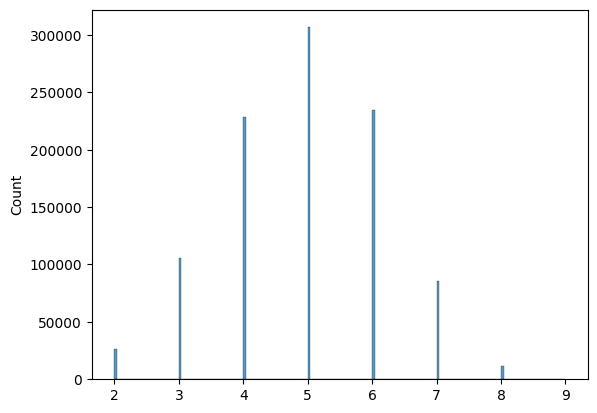

In [52]:
sns.histplot(np.array(env_wrapped.length_queue).flatten())

<Axes: ylabel='Count'>

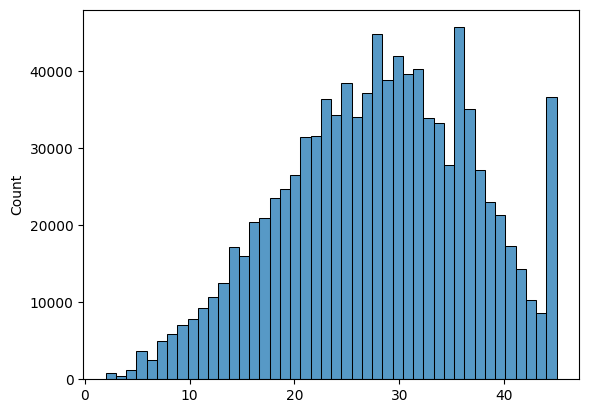

In [53]:
sns.histplot(np.array(env_wrapped.return_queue).flatten(), bins=44)

# Visualization

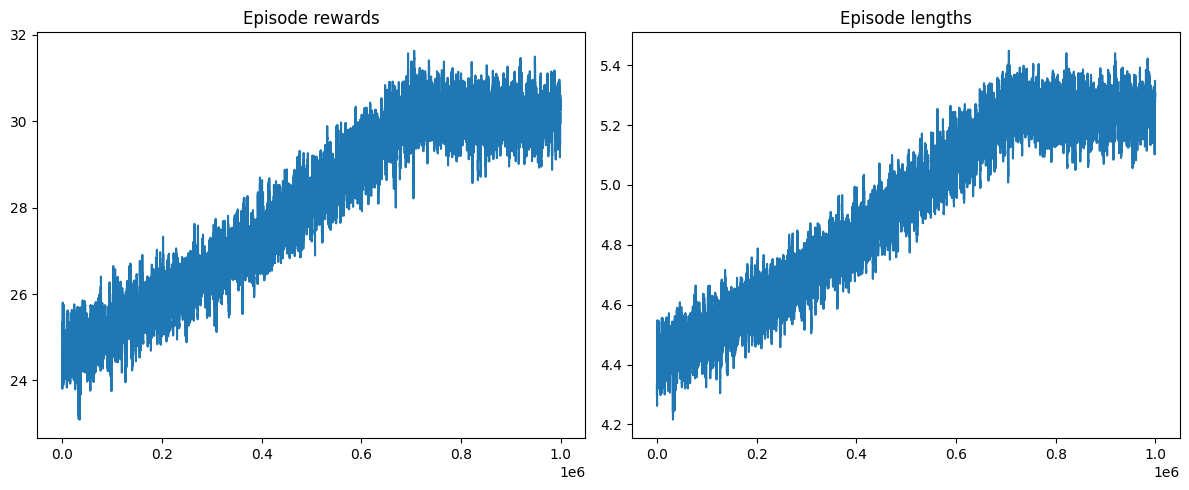

In [54]:
plot_training(env_wrapped)

In [5]:
from analysis_tools import get_ranked_actions


get_ranked_actions(agent, ((1,2,3,4,5,6,0,0,9), 6))

NameError: name 'agent' is not defined

In [ ]:
#calculate_policy(env, agent)

# Statistical Testing

In [ ]:
agent.epsilon=0
n_episodes = 100_000

env_2 = Klappbrett(None)
env_wrapped_max = gym.wrappers.RecordEpisodeStatistics(env_2, deque_size=n_episodes)

for episode in tqdm(range(n_episodes)):
    np.random.seed(episode)
    obs, info = env_wrapped_max.reset()
    done = False
     
    while not (done):
        action =  choose_from_lexographical_ordering(obs, largest_first=True, index=0)
        next_obs, reward, terminated, truncated, info = env_wrapped_max.step(action)
        done = terminated or truncated
        obs = next_obs
env_wrapped_max.close()

100%|██████████| 100000/100000 [01:28<00:00, 1134.72it/s]


In [ ]:
env_2 = Klappbrett(None)
env_wrapped_agent = gym.wrappers.RecordEpisodeStatistics(env_2, deque_size=n_episodes)

for episode in tqdm(range(n_episodes)):
    np.random.seed(episode)
    obs, info = env_wrapped_agent.reset()
    done = False

    while not done:
        
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env_wrapped_agent.step(action)
        done = terminated or truncated
        obs = next_obs
env_wrapped_agent.close()

100%|██████████| 100000/100000 [02:10<00:00, 764.75it/s]


In [59]:
print(f"Mean choose max: {np.mean(env_wrapped_max.return_queue)}")
print(f"Mean choose agent: {np.mean(env_wrapped_agent.return_queue)}")

Mean choose max: 33.662330627441406
Mean choose agent: 33.775840759277344


In [60]:
U1, p = stats.mannwhitneyu(env_wrapped_max.return_queue, env_wrapped_agent.return_queue, method="auto")
print(p)

[0.00141236]


# Policy

In [ ]:
from klappbrettEnv import Klappbrett
from q_learning_agent import KlappbrettAgent
from analysis_tools import plot_policy


env_2 = Klappbrett(None)
agent = KlappbrettAgent(9, 2, 0.01 ,1, 0.01, 0.01)
env_2.reset()

plot_policy(agent)

In [4]:
n_episodes = 3

# environment hyperparameters
render_mode=None
board_size=9
number_of_dice=2
number_of_sides = 6


env_2 = Klappbrett(render_mode="human",
                 board_size=board_size,
                 number_of_dice=number_of_dice,
                 number_of_sides=number_of_sides)

env_wrapped = gym.wrappers.RecordEpisodeStatistics(env_2, deque_size=n_episodes) # type: ignore

for _ in tqdm(range(n_episodes)):
    obs, _ = env_wrapped.reset()
    done = False

    while not done:
        action =  choose_from_lexographical_ordering(obs, largest_first=True, index=0)
        next_obs, reward, terminated, truncated, info = env_wrapped.step(action)
        done = terminated or truncated
        obs = next_obs
env_wrapped.close()

100%|██████████| 3/3 [00:51<00:00, 17.17s/it]
